<a href="https://colab.research.google.com/github/KIM-CHAEYOUNG/PROJECT_bike_station/blob/master/06_%EC%9D%B8%EA%B5%AC%EB%88%84%EC%A0%81%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 고양시 공공자전거스테이션 최적화

##1.분석배경
	- 고양시 2010년 공공자전거 서비스 도입, 약 161개 스테이션과 1700여대 공공자전거를 시민에게 제공
	- 현재 고양시 신규 택지개발(장항/송산/대화) 등으로 도시화 지역 증가 + 인구 증가
	

	=> 인구증가와 도심 증가에 따른 자전거 스테이션 접근성 개선이 필요

##2.분석목적

	- 향후 시민들의 공공자전거 사용에 대한 접근성 개선

##3.분석방법
	1. 공공 자전거 스테이션 현황
		1) 배치 현황 	
		2) 사용빈도
		3) 주요 사용 시간대

	2. 고양시 유동성 데이터 분석 
	; 승하차 인구량을 기준으로 유동인구 분석
		1) 버스 
		2) 지하철 

	3. 고양시 거주 인구 데이터 분석
		1) 최근 3개년(2017-2019) 고양시 인구 변화
		2) 신규 택지개발지역(장항/송산/대화) 3개년 인구 변화

## 위 분석결과를 통한 현재 결론
		1. 현재 자전거 스테이션은 유동인구가 많은 버스/지하철 정류장 인근 
			-> 현황 유지
		2. 막차 이후 사용량이 많지만 반납 장소가 거주지에서 멀리 떨어져 있어 반납의 어려움이 있음. 
			-> 막차 이후 대여량이 많아지는 정류장+ 반납량이 많은 스테이션 주변에 추가 설치
		3. 장항/송산/대화 지역 거주 인구 증가에 비례하지 못하는 자전거 스테이션 
			-> 장항/송산/대화 인구에 맞는 자전거 스테이션 위치 추가 확보

#***인구누적분포데이터 분석 결과 예측***
- 장항/송산/대화 지역 인구 밀집 증가
- 특히 킨텍스 신시가지 및 호수공원 일대 인구 누적 증가 -> 근방 자전거 스테이션 추가 설치

In [7]:
# 구글 mount
from google.colab import drive
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
%cd drive/'My Drive'/'고양시'/

/content/drive/My Drive/고양시


In [9]:
%ls

'미래 영향요인 조사'/
 화성시/
 분석완료/
 01.운영이력.csv
 02.자전거스테이션.csv
 03.꽃박람회일정.csv
 03_map/
 03_map.zip
 04.KINTEX행사일정.csv
 05.기상정보.csv
'06.인구(거주)분포도(100M_X_100M).geojson'
 07.인구통계.csv
'08.행정경계(시군구).geojson'
'09.행정경계(읍면동).geojson'
 아이디어1/
'10.도시계획(공간시설).geojson'
'11.도시계획(공공문화체육시설).geojson'
'12.도시계획(교통시설).geojson'
'13.용도지역지구(습지보호지역).geojson'
 14.고양시_지적도.geojson
 15.도로명주소_건물.geojson
 16.도로명주소_도로.geojson
'17.일반건물_분포도(100M_X_100M).geojson'
 18.행사장_공간정보.csv
 19.전철역_공간정보.csv
 아이디어2/
 20.고양시_버스정류소.csv
 20.고양시_버스정류소.csv.20.고양시_버스정류소.vrt
 21.버스_정류장별_승하차_정보.csv
 22.주차장정보.csv
 23.고양시덕양구_DEM.img
 24.고양시일산동구_DEM.img
 25.고양시일산서구_DEM.img
'26.고양시 공연장 박물관 정보.csv'
'27.고양시 체육시설 현

In [11]:
#geopandas 패키지 설치
%%time

# important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal

# install rtree-Geopandas requirment
!apt install python3-rtree

#install GEOPANDAS
! pip install git+git://github.com/geopandas/geopandas.git

#install descartes - Geopandas requirment
!pip install descartes

#install Folium for Geographic data visualization
! pip install folium

#install plotlyExpress
!pip install plotly_express


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-

In [12]:
# 패키지 불러오기

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

In [13]:
# 인구누적분포 데이터 읽어오기
# geopandas

pop_distribution = gpd.read_file('/content/drive/My Drive/고양시/06.인구(거주)분포도(100M_X_100M).geojson')
pop_distribution

,gid,val,geometry
0,다사268650,NaN,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,NaN,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,NaN,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,NaN,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,NaN,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."
...,...,...,...
27345,다사553641,NaN,"MULTIPOLYGON (((126.99310 37.67534, 126.99310 ..."
27346,다사553642,NaN,"MULTIPOLYGON (((126.99310 37.67624, 126.99309 ..."
27347,다사553643,NaN,"MULTIPOLYGON (((126.99309 37.67714, 126.99308 ..."
27348,다사553644,NaN,"MULTIPOLYGON (((126.99308 37.67804, 126.99308 ..."


In [20]:
# val컬럼의 NaN : 거주인구 없음을 의미
# val컬럼의 NaN값을 제외한 시리즈 추출
pop_distribution_val=pop_distribution.groupby(['gid','val']).sum()

pop_distribution_val=pop_distribution_val.reset_index()
pop_distribution_val

,gid,val,geometry
0,다사277649,0.0,"(POLYGON ((126.6800610489505 37.6807883246783,..."
1,다사277652,8.0,(POLYGON ((126.6800312865019 37.68349206341949...
2,다사277653,11.0,(POLYGON ((126.6800213648016 37.68439330938592...
3,다사277656,0.0,(POLYGON ((126.6799915970475 37.68709704644339...
4,다사278651,13.0,(POLYGON ((126.6811752076359 37.68259869660541...
...,...,...,...
9236,다사536607,0.0,(POLYGON ((126.9740400816905 37.64460990861157...
9237,다사538597,0.0,(POLYGON ((126.9763703276994 37.63560691889907...
9238,다사538608,0.0,"(POLYGON ((126.9763007352722 37.6455213004185,..."
9239,다사539608,0.0,(POLYGON ((126.9774342401782 37.64552632679178...


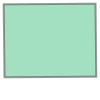

In [25]:
pop_distribution_val.geometry[4]

- 09_행정경계(읍면동)
    - EMD_CD : 읍면동 코드
    - EMD_KOR_NM : 읍면동명

In [21]:
# 매핑을 위한 행정경계(읍면동) 데이터 

eupmyundong = gpd.read_file('/content/drive/My Drive/고양시/09.행정경계(읍면동).geojson')
eupmyundong



,EMD_CD,EMD_KOR_NM,geometry
0,41281101,주교동,"MULTIPOLYGON (((126.81068 37.65820, 126.81069 ..."
1,41281102,원당동,"MULTIPOLYGON (((126.83321 37.68013, 126.83340 ..."
2,41281103,신원동,"MULTIPOLYGON (((126.86362 37.67729, 126.86364 ..."
3,41281104,원흥동,"MULTIPOLYGON (((126.85975 37.65081, 126.85990 ..."
4,41281105,도내동,"MULTIPOLYGON (((126.84806 37.62348, 126.84835 ..."
5,41281106,성사동,"MULTIPOLYGON (((126.83047 37.64860, 126.83053 ..."
6,41281107,북한동,"MULTIPOLYGON (((126.95320 37.65582, 126.95334 ..."
7,41281108,효자동,"MULTIPOLYGON (((126.94756 37.65922, 126.94777 ..."
8,41281109,지축동,"MULTIPOLYGON (((126.89619 37.65389, 126.89627 ..."
9,41281110,오금동,"MULTIPOLYGON (((126.89197 37.67066, 126.89222 ..."


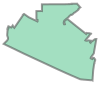

In [26]:
eupmyundong.geometry[52]

34_고양시행정경계(행정동기준)
- 행정동 코드
- 행정동명
- geometry

In [22]:
#고양시 행정경계(행정동기준)
hangjeongdong = gpd.read_file('/content/drive/My Drive/고양시/34.고양시_행정경계(행정동기준).geojson')
hangjeongdong

,행정동코드,행정동명,geometry
0,3110151,주교동,"MULTIPOLYGON (((126.83514 37.67683, 126.83517 ..."
1,3110152,원신동,"MULTIPOLYGON (((126.84983 37.68986, 126.84996 ..."
2,3110153,흥도동,"MULTIPOLYGON (((126.87615 37.64768, 126.87562 ..."
3,3110154,성사1동,"MULTIPOLYGON (((126.84898 37.66872, 126.84915 ..."
4,3110155,성사2동,"MULTIPOLYGON (((126.83502 37.65491, 126.83527 ..."
5,3110156,효자동,"MULTIPOLYGON (((126.95736 37.69195, 126.95790 ..."
6,3110170,삼송동,"MULTIPOLYGON (((126.90630 37.67545, 126.90630 ..."
7,3110158,창릉동,"MULTIPOLYGON (((126.90072 37.65079, 126.90124 ..."
8,3110159,고양동,"MULTIPOLYGON (((126.92910 37.74849, 126.92964 ..."
9,3110160,관산동,"MULTIPOLYGON (((126.85891 37.73417, 126.85881 ..."


35_고양시_도시화지역경계
- SIGUNGU_CD  - 해당지역 시군구코드
- UA_CD - 해당지역 도시화지역코드
- UA_NM_ 해당지역 도시화지역명
- INGU_CNT-해당지역 인구
- UA_AREA - 해당지역 도시지목면적
- BAS_CNT - 기초단위구수

In [23]:
city_bound = gpd.read_file('/content/drive/My Drive/고양시/35.고양시_도시화지역경계.geojson')
city_bound 

,SIGUNGU_CD,UA_CD,UA_NM,INGU_CNT,UA_AREA,BAS_CNT,geometry
0,31101,UA311011,도시화지역 1,200330.0,5493213.78,1105,"MULTIPOLYGON (((126.83119 37.64876, 126.83131 ..."
1,31101,UA311012,도시화지역 10,3553.0,308050.11,17,"MULTIPOLYGON (((126.87061 37.60478, 126.87064 ..."
2,31101,UA311013,도시화지역 2,64906.0,2906659.22,381,"MULTIPOLYGON (((126.87958 37.64411, 126.87942 ..."
3,31101,UA311014,도시화지역 3,47864.0,1347246.48,338,"MULTIPOLYGON (((126.83641 37.66600, 126.83655 ..."
4,31101,UA311015,도시화지역 4,21652.0,734702.03,107,"MULTIPOLYGON (((126.89562 37.66369, 126.89570 ..."
5,31101,UA311016,도시화지역 5,20735.0,512190.96,123,"MULTIPOLYGON (((126.90673 37.71124, 126.90669 ..."
6,31101,UA311017,도시화지역 6,12266.0,362798.92,82,"MULTIPOLYGON (((126.86483 37.69379, 126.86505 ..."
7,31101,UA311018,도시화지역 7,10318.0,628378.85,58,"MULTIPOLYGON (((126.85891 37.71724, 126.85898 ..."
8,31101,UA311019,도시화지역 8,7770.0,414097.95,29,"MULTIPOLYGON (((126.84777 37.73355, 126.84729 ..."
9,31101,UA3110110,도시화지역 9,4288.0,130148.22,39,"MULTIPOLYGON (((126.90758 37.72327, 126.90771 ..."


In [28]:
city_bound[:9]

,SIGUNGU_CD,UA_CD,UA_NM,INGU_CNT,UA_AREA,BAS_CNT,geometry
0,31101,UA311011,도시화지역 1,200330.0,5493213.78,1105,"MULTIPOLYGON (((126.83119 37.64876, 126.83131 ..."
1,31101,UA311012,도시화지역 10,3553.0,308050.11,17,"MULTIPOLYGON (((126.87061 37.60478, 126.87064 ..."
2,31101,UA311013,도시화지역 2,64906.0,2906659.22,381,"MULTIPOLYGON (((126.87958 37.64411, 126.87942 ..."
3,31101,UA311014,도시화지역 3,47864.0,1347246.48,338,"MULTIPOLYGON (((126.83641 37.66600, 126.83655 ..."
4,31101,UA311015,도시화지역 4,21652.0,734702.03,107,"MULTIPOLYGON (((126.89562 37.66369, 126.89570 ..."
5,31101,UA311016,도시화지역 5,20735.0,512190.96,123,"MULTIPOLYGON (((126.90673 37.71124, 126.90669 ..."
6,31101,UA311017,도시화지역 6,12266.0,362798.92,82,"MULTIPOLYGON (((126.86483 37.69379, 126.86505 ..."
7,31101,UA311018,도시화지역 7,10318.0,628378.85,58,"MULTIPOLYGON (((126.85891 37.71724, 126.85898 ..."
8,31101,UA311019,도시화지역 8,7770.0,414097.95,29,"MULTIPOLYGON (((126.84777 37.73355, 126.84729 ..."


In [30]:
hangjeongdong[:19]

,행정동코드,행정동명,geometry
0,3110151,주교동,"MULTIPOLYGON (((126.83514 37.67683, 126.83517 ..."
1,3110152,원신동,"MULTIPOLYGON (((126.84983 37.68986, 126.84996 ..."
2,3110153,흥도동,"MULTIPOLYGON (((126.87615 37.64768, 126.87562 ..."
3,3110154,성사1동,"MULTIPOLYGON (((126.84898 37.66872, 126.84915 ..."
4,3110155,성사2동,"MULTIPOLYGON (((126.83502 37.65491, 126.83527 ..."
5,3110156,효자동,"MULTIPOLYGON (((126.95736 37.69195, 126.95790 ..."
6,3110170,삼송동,"MULTIPOLYGON (((126.90630 37.67545, 126.90630 ..."
7,3110158,창릉동,"MULTIPOLYGON (((126.90072 37.65079, 126.90124 ..."
8,3110159,고양동,"MULTIPOLYGON (((126.92910 37.74849, 126.92964 ..."
9,3110160,관산동,"MULTIPOLYGON (((126.85891 37.73417, 126.85881 ..."


도시화 경계 코드 31101/31103/31104 -> 이 코드를 일부가지는 읍면동의 면적합

만약 면적이 같다면 해당 지역 도시화 지역
해당 도시화 지역 내에 인구누적 분포 데이터에서 유의미한 값을 가지는 곳이 있는가?